# Imports

In [2]:
import json
import pandas as pd

## Load file

In [7]:
movies_metadata = pd.read_csv('movies_metadata.csv')

def delete_columns():
    del movies_metadata["belongs_to_collection"]
    del movies_metadata["budget"]
    del movies_metadata["homepage"]
    del movies_metadata["id"]
    del movies_metadata["imdb_id"]
    del movies_metadata["original_language"]
    del movies_metadata["overview"]
    del movies_metadata["popularity"]
    del movies_metadata["poster_path"]
    del movies_metadata["production_companies"]
    del movies_metadata["production_countries"]
    del movies_metadata["revenue"]
    del movies_metadata["spoken_languages"]
    del movies_metadata["status"]
    del movies_metadata["tagline"]
    del movies_metadata["video"]
    
delete_columns()

# # Methods to Get Data

In [24]:
def get_load_genres_to_movies_metadata():
    genres =[]

    for index, row in movies_metadata[['genres']].iterrows():
        s = row[0]
        s = s.replace("'",'"')
        
        j = json.loads(s) 
        for item in j:
            genres.append(item['name'])

    d = dict()
    d['genres'] = set(genres)
    d['genre_size'] = []
    
    for genre in d['genres']:
        genre_size = genres.count(genre)
        d['genre_size'].append(genre_size)
    
    return d


def get_amount_adult_to_movies_metadata():
    adult_list = movies_metadata['adult'].tolist()
    
    d = dict()
    d['adult'] = adult_list.count('True')
    d['geral'] = adult_list.count('False')
    return d
    
    
def get_release_date_to_movies_metadata():
    all_release_date = movies_metadata['release_date'].tolist()
        
    years = pd.to_datetime(movies_metadata['release_date'], errors='coerce').dt.year
    years = years.dropna()
    return years
    
    
def get_runtime_movies_metadata():
    return movies_metadata['runtime'].tolist()

# Graph's

## Genres

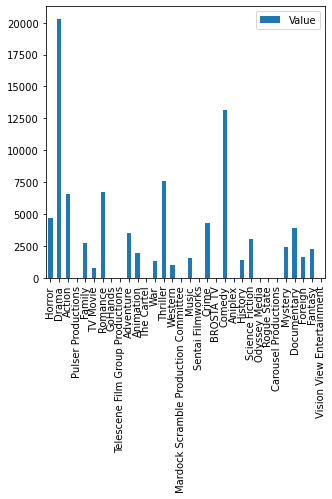

In [25]:
genres_metadata_adults = get_load_genres_to_movies_metadata()

df_genres = pd.DataFrame(
    {'Value': genres_metadata_adults['genre_size']},
    index=genres_metadata_adults['genres']
)

df_genres.plot.bar(figsize=(5, 5))

## Adults

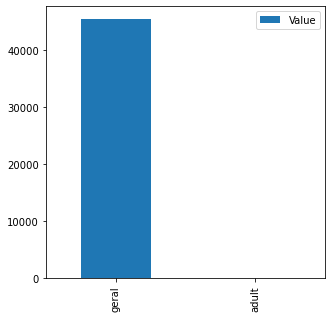

In [26]:
movies_metadata_adults = get_amount_adult_to_movies_metadata()

df_adults = pd.DataFrame(
    {'Value': [movies_metadata_adults['geral'],movies_metadata_adults['adult']]},
    index=['geral', 'adult']
)

df_adults.plot.bar(figsize=(5, 5))

## Runtime

Text(0.5, 0, 'Runtime')

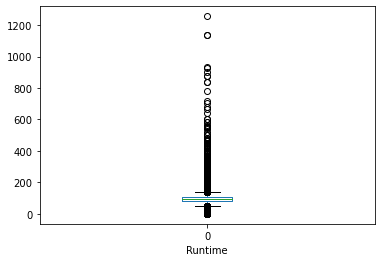

In [27]:
df_runtime = pd.DataFrame(get_runtime_movies_metadata())
graph_runtime = df_runtime.plot.box()
graph_runtime.set_xlabel("Runtime")

## Year

Text(0.5, 0, 'Years')

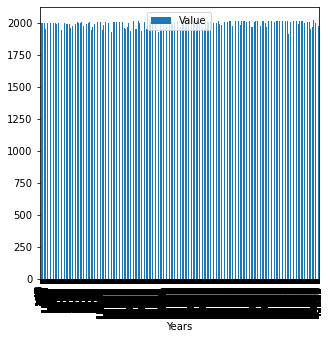

In [28]:
year_metadata_adults = get_release_date_to_movies_metadata()

df_year = pd.DataFrame(
    {'Value': year_metadata_adults.tolist()}
)

graph_years = df_year.plot.bar(figsize=(5, 5))
graph_years.set_xlabel("Years")

# Recommendation

In [29]:
#IMDb's rating system - formula 
#weighted rating (WR) = (v ÷ (v+m)) × R + (m ÷ (v+m)) × C
#Where:
#R = average for the movie (mean) = (Rating)
#v = number of votes for the movie = (votes)
#m = minimum votes required to be listed in the Top 250 (currently 25,000)
#C = the mean vote across the whole report
def get_vote_average():
    all_vote_count = movies_metadata['vote_count'].tolist()
    all_vote_count = [n for n in all_vote_count if str(n) != 'nan']
    m = sum(all_vote_count) / len(all_vote_count) * .7
    
    all_vote_average = movies_metadata['vote_average'].tolist()
    all_vote_average = [n for n in all_vote_average if str(n) != 'nan']
    c = sum(all_vote_average) / len(all_vote_average)
    
    scores = []
    for index, row in movies_metadata.iterrows():
        v = row['vote_count']
        R = row['vote_average']
        weighted_rating = (v/(v+m) * R + (m/(m+v) * c))
        scores.append(weighted_rating)
    
    return scores

movies_metadata['score'] = get_vote_average()
movies_metadata = movies_metadata.sort_values('score', ascending=False)
movies_metadata.head(5)

,adult,genres,original_title,release_date,runtime,title,vote_average,vote_count,score
10309,False,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",Dilwale Dulhania Le Jayenge,1995-10-20,190.0,Dilwale Dulhania Le Jayenge,9.1,661.0,8.737027
314,False,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",The Shawshank Redemption,1994-09-23,142.0,The Shawshank Redemption,8.5,8358.0,8.473718
834,False,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",The Godfather,1972-03-14,175.0,The Godfather,8.5,6024.0,8.463663
40251,False,"[{'id': 10749, 'name': 'Romance'}, {'id': 16, ...",君の名は。,2016-08-26,106.0,Your Name.,8.5,1030.0,8.299724
12481,False,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",The Dark Knight,2008-07-16,152.0,The Dark Knight,8.3,12269.0,8.283290
